In [13]:
# import libraries
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [2]:
# use option to display all columns of dataframe
pd.set_option('display.max_columns', None)

In [3]:
# import the data using URL
# currently there is an error with the data
#github_url = "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2024-25/gws/merged_gw.csv"
#raw_data = pd.read_csv(github_url)

In [4]:
# import the data using local file
raw_data = pd.read_csv("merged_gw.csv")

### Exploratory Data Analysis (EDA)

Exploratory data analysis is a crucial steps, as it assesses and ensures the quality of the data. In this section, I will handle the raw data with the following steps:

* Initial data exploration
* Missing value analysis
* Time series analysis
* Power and setpoint relationship analysis
* Power and wind relationship analysis

These steps aim to exclude data inconsistencies, missing values or potentially noisy data.

In [5]:
# inspect the first 10 rows of the data
raw_data.head(10)

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,modified,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,starts,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Alex Scott,MID,Bournemouth,1.6,0,0,11,0,12.8,77,0.01,0.01,0.0,1.02,6,1,0,3.6,22.8,2024-08-17T14:00:00Z,62,False,16,0,0,0,0,1,0,4339,1,1,1,0,2,0,0,0,50,False,0,1
1,Carlos Miguel dos Santos Pereira,GK,Nott'm Forest,2.2,0,0,0,0,0.0,427,0.00,0.00,0.0,0.00,6,0,0,0.0,0.0,2024-08-17T14:00:00Z,0,False,3,0,0,0,0,1,0,33324,0,1,1,0,0,0,0,0,45,True,0,1
2,Tomiyasu Takehiro,DEF,Arsenal,0.0,0,0,0,0,0.0,22,0.00,0.00,0.0,0.00,2,0,0,0.0,0.0,2024-08-17T14:00:00Z,0,False,20,0,0,0,0,1,0,8462,0,0,2,0,0,0,0,0,50,True,0,1
3,Malcolm Ebiowei,MID,Crystal Palace,0.0,0,0,0,0,0.0,197,0.00,0.00,0.0,0.00,8,0,0,0.0,0.0,2024-08-18T13:00:00Z,0,False,4,0,0,0,0,1,0,716,0,1,2,0,0,0,0,0,45,False,0,1
4,Ben Brereton Díaz,MID,Southampton,1.0,0,0,-2,0,14.0,584,0.02,0.32,0.3,0.25,5,1,0,3.3,2.6,2024-08-17T14:00:00Z,70,False,15,0,0,0,0,1,0,66244,1,0,1,16,1,0,0,0,55,False,1,1
5,Pau Torres,DEF,Aston Villa,1.9,0,0,17,0,1.9,52,0.01,0.01,0.0,2.46,7,1,0,3.1,29.2,2024-08-17T16:30:00Z,90,False,19,0,0,0,0,1,0,122710,1,2,1,0,2,0,0,0,45,False,0,1
6,Joel Ward,DEF,Crystal Palace,1.9,0,0,0,0,0.0,215,0.00,0.00,0.0,0.00,8,0,0,0.0,0.0,2024-08-18T13:00:00Z,0,False,4,0,0,0,0,1,0,12469,0,1,2,0,0,0,0,0,45,False,0,1
7,Will Lankshear,FWD,Spurs,1.5,0,0,0,0,0.0,609,0.00,0.00,0.0,0.00,10,0,0,0.0,0.0,2024-08-19T19:00:00Z,0,False,11,0,0,0,0,1,0,17747,0,1,1,0,0,0,0,0,45,False,0,1
8,Hwang Hee-chan,MID,Wolves,1.3,0,0,14,0,16.3,550,0.11,0.11,0.0,1.24,2,2,0,2.6,6.0,2024-08-17T14:00:00Z,90,False,1,0,0,0,0,1,0,83019,1,0,2,4,2,0,0,0,65,False,0,1
9,Mikey Moore,MID,Spurs,1.5,0,0,0,0,0.0,610,0.00,0.00,0.0,0.00,10,0,0,0.0,0.0,2024-08-19T19:00:00Z,0,False,11,0,0,0,0,1,0,8413,0,1,1,0,0,0,0,0,45,False,0,1


In [6]:
# explore the first row of data to get an idea of how it looks
raw_data.iloc[0]

name                                    Alex Scott
position                                       MID
team                                   Bournemouth
xP                                             1.6
assists                                          0
bonus                                            0
bps                                             11
clean_sheets                                     0
creativity                                    12.8
element                                         77
expected_assists                              0.01
expected_goal_involvements                    0.01
expected_goals                                 0.0
expected_goals_conceded                       1.02
fixture                                          6
goals_conceded                                   1
goals_scored                                     0
ict_index                                      3.6
influence                                     22.8
kickoff_time                  2

In [7]:
# check the shape of the data
raw_data.shape

(15663, 42)

In [25]:
# check for null values in the data
raw_data.isnull().sum().any()

False

In [28]:
# check for duplicate values in the data
raw_data.duplicated().sum()

0

In [8]:
# check the data types of the columns and the number of non-null values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15663 entries, 0 to 15662
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        15663 non-null  object 
 1   position                    15663 non-null  object 
 2   team                        15663 non-null  object 
 3   xP                          15663 non-null  float64
 4   assists                     15663 non-null  int64  
 5   bonus                       15663 non-null  int64  
 6   bps                         15663 non-null  int64  
 7   clean_sheets                15663 non-null  int64  
 8   creativity                  15663 non-null  float64
 9   element                     15663 non-null  int64  
 10  expected_assists            15663 non-null  float64
 11  expected_goal_involvements  15663 non-null  float64
 12  expected_goals              15663 non-null  float64
 13  expected_goals_conceded     156

After inspecting the data and all of the available columns, I will now filter the dataset to include only the relevant columns for my analysis and modelling.

I am focusing on performance metrics that are generally available across football reporting. These include goals scored, assists, clean sheets, yellow cards, red cards, and other standard football statistics. 

The FPL website also provides proprietary metrics such as creativity, influence, and threat, which are specific to their platform and not commonly found in general football datasets. To ensure consistency and broader applicability of the analysis, I am excluding these FPL-specific statistics and only considering universally available performance data. This approach allows for better comparability with external football data sources and enhances the relevance of insights beyond FPL.

In [9]:
# create a list of columns to keep
columns_filter = ['GW', 'round', 'fixture', 'name', 'position', 'team', 'opponent_team', 'starts', 'minutes',
                    'goals_scored', 'expected_goals', 'assists', 'expected_assists', 'expected_goal_involvements',
                    'goals_conceded', 'expected_goals_conceded', 'clean_sheets', 'own_goals',
                    'yellow_cards', 'red_cards', 'penalties_missed', 'saves', 'penalties_saved', 'was_home',
                    'total_points','bonus']

# create a new dataframe with only the relevant columns
df = raw_data[columns_filter].copy()
df.head()

,GW,round,fixture,name,position,team,opponent_team,starts,minutes,goals_scored,expected_goals,assists,expected_assists,expected_goal_involvements,goals_conceded,expected_goals_conceded,clean_sheets,own_goals,yellow_cards,red_cards,penalties_missed,saves,penalties_saved,was_home,total_points,bonus
0,1,1,6,Alex Scott,MID,Bournemouth,16,1,62,0,0.0,0,0.01,0.01,1,1.02,0,0,0,0,0,0,0,False,2,0
1,1,1,6,Carlos Miguel dos Santos Pereira,GK,Nott'm Forest,3,0,0,0,0.0,0,0.00,0.00,0,0.00,0,0,0,0,0,0,0,True,0,0
2,1,1,2,Tomiyasu Takehiro,DEF,Arsenal,20,0,0,0,0.0,0,0.00,0.00,0,0.00,0,0,0,0,0,0,0,True,0,0
3,1,1,8,Malcolm Ebiowei,MID,Crystal Palace,4,0,0,0,0.0,0,0.00,0.00,0,0.00,0,0,0,0,0,0,0,False,0,0
4,1,1,5,Ben Brereton Díaz,MID,Southampton,15,1,70,0,0.3,0,0.02,0.32,1,0.25,0,0,1,0,0,0,0,False,1,0


In [22]:
# inspect the summary statistics of each column of the data
# inspect these to spot any potential outliers or errors  
df.describe(include='all')

,GW,round,fixture,name,position,team,opponent_team,starts,minutes,goals_scored,expected_goals,assists,expected_assists,expected_goal_involvements,goals_conceded,expected_goals_conceded,clean_sheets,own_goals,yellow_cards,red_cards,penalties_missed,saves,penalties_saved,was_home,total_points,bonus
count,15663.000000,15663.000000,15663.000000,15663,15663,15663,15663.000000,15663.000000,15663.000000,15663.000000,15663.000000,15663.000000,15663.000000,15663.000000,15663.000000,15663.000000,15663.000000,15663.000000,15663.000000,15663.000000,15663.000000,15663.000000,15663.000000,15663,15663.000000,15663.000000
unique,NaN,NaN,NaN,756,5,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,NaN,Alex Scott,MID,Brighton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
freq,NaN,NaN,NaN,23,7090,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7851,NaN,NaN
mean,12.286216,12.286216,118.359637,NaN,NaN,NaN,10.506225,0.321650,28.798251,0.042968,0.043653,0.038626,0.028375,0.072023,0.485284,0.474827,0.075273,0.001149,0.064355,0.001979,0.000511,0.092894,0.000511,NaN,1.202260,0.092511
std,6.638185,6.638185,66.459569,NaN,NaN,NaN,5.765637,0.467124,38.509345,0.225453,0.150669,0.210749,0.086722,0.191907,0.945196,0.778667,0.263840,0.035716,0.245393,0.044445,0.022595,0.635328,0.022595,NaN,2.377174,0.455037
min,1.000000,1.000000,1.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-5.000000,0.000000
25%,7.000000,7.000000,61.000000,NaN,NaN,NaN,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
50%,12.000000,12.000000,119.000000,NaN,NaN,NaN,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
75%,18.000000,18.000000,176.500000,NaN,NaN,NaN,15.000000,1.000000,76.000000,0.000000,0.000000,0.000000,0.010000,0.030000,1.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000


All data columns seem to be correct with no major outliers and no unexpected min, max, or mean.

The `total_points` column has a minus for its minimum value which is not very common but not unusual, as players receive minus points for various reasons such as yellow/red cards, goals conceded, penalties missed so this is not an issue. However, I will inspect the statistics of any player that has negative points to be certain.

In [11]:
# filter the data to check for negative values in the total_points column, and inspect the top 10 lowest total_points values
# this will help identify any potential errors in the data
df.loc[(df['total_points'] < 0)].sort_values(by='total_points', ascending=True).head(10)

,GW,round,fixture,name,position,team,opponent_team,starts,minutes,goals_scored,expected_goals,assists,expected_assists,expected_goal_involvements,goals_conceded,expected_goals_conceded,clean_sheets,own_goals,yellow_cards,red_cards,penalties_missed,saves,penalties_saved,was_home,total_points,bonus
5290,9,9,83,Harry Clarke,DEF,Ipswich,4,1,68,0,0.00,0,0.02,0.02,4,3.26,0,1,0,1,0,0,0,False,-5,0
8662,14,14,134,Craig Dawson,DEF,Wolves,8,1,90,0,0.00,0,0.00,0.00,4,1.02,0,2,0,0,0,0,0,False,-4,0
8719,14,14,140,Jack Stephens,DEF,Southampton,6,1,38,0,0.00,0,0.00,0.00,5,2.26,0,0,0,1,0,0,0,True,-4,0
10353,16,16,155,Andrew Robertson,DEF,Liverpool,9,1,16,0,0.00,0,0.00,0.00,2,0.11,0,0,0,1,0,0,0,True,-3,0
4799,8,8,71,William Saliba,DEF,Arsenal,3,1,29,0,0.00,0,0.00,0.00,2,0.03,0,0,0,1,0,0,0,False,-3,0
4809,8,8,72,Jaden Philogene,MID,Aston Villa,9,0,29,0,0.04,0,0.00,0.04,0,0.11,0,0,0,1,0,0,0,False,-2,0
5076,8,8,72,Issa Diop,DEF,Fulham,2,0,22,0,0.03,0,0.00,0.03,1,0.17,0,1,1,0,0,0,0,True,-2,0
6328,10,10,97,Edson Álvarez Velázquez,MID,West Ham,16,1,46,0,0.00,0,0.01,0.01,3,1.30,0,0,0,1,0,0,0,False,-2,0
7405,12,12,113,Carlos Baleba,MID,Brighton,3,1,58,0,0.00,0,0.02,0.02,1,0.68,0,0,0,1,0,0,0,False,-2,0
149,1,1,5,Fabian Schär,DEF,Newcastle,17,1,27,0,0.04,0,0.00,0.04,0,0.20,0,0,0,1,0,0,0,True,-2,0


I will now check for any data points where `total_points` has a negative value but none of the negatively impacting columns contain data. These columns include `goals_conceded`, `own_goals`, `yellow_cards`, `red_cards`, and `penalties_missed`. This check will help identify potential errors in cases where a player has negative total points without any recorded negative contributions.

In [ ]:
# this will help identify any potential errors in the data
df.loc[(df['total_points'] < 0) & (df['goals_conceded'] < 2) & (df['own_goals'] < 1) & (df['yellow_cards'] < 1) & (df['red_cards'] < 1) & (df['penalties_missed'] < 1)].sort_values(by='total_points', ascending=True).head(10)

,GW,round,fixture,name,position,team,opponent_team,starts,minutes,goals_scored,expected_goals,assists,expected_assists,expected_goal_involvements,goals_conceded,expected_goals_conceded,clean_sheets,own_goals,yellow_cards,red_cards,penalties_missed,saves,penalties_saved,was_home,total_points,bonus


These negative points line up with my expectation that it is a result of players receiving yellow and red cards, scoring own goals, and conceding multiple goals. Through my additional check, I can see that there are no data points where a player has negative total points without any recorded negative contributions.

I will now investigate the total_points variable, as this will be used as my target variable in modelling

In [25]:
# inspect the top 10 highest total_points values
df[['GW', 'name', 'team', 'position', 'total_points', 'goals_scored', 'assists', 'clean_sheets', 'bonus']].sort_values(by='total_points', ascending=False).head(10)

,GW,name,team,position,total_points,goals_scored,assists,clean_sheets,bonus
3224,6,Cole Palmer,Chelsea,MID,25,4,0,0,3
8353,13,Kevin Schade,Brentford,MID,23,3,1,0,3
14660,22,Justin Kluivert,Bournemouth,MID,22,3,1,0,3
10778,17,Mohamed Salah,Liverpool,MID,21,2,2,0,3
15101,23,Dango Ouattara,Bournemouth,MID,21,3,0,1,3
8371,13,Justin Kluivert,Bournemouth,MID,20,3,0,0,3
14102,21,Amad Diallo,Man Utd,MID,20,3,0,0,3
712,2,Noni Madueke,Chelsea,MID,20,3,0,0,3
14301,22,Phil Foden,Man City,MID,19,2,1,1,3
13309,20,Bryan Mbeumo,Brentford,MID,19,2,1,1,3


In [ ]:
# find the top 10 highest total points scorers in the data
df.groupby(['name', 'team']).sum()[['total_points']].sort_values(by='total_points', ascending=False).head(10)

,,total_points
name,team,
Mohamed Salah,Liverpool,222
Cole Palmer,Chelsea,167
Alexander Isak,Newcastle,150
Bryan Mbeumo,Brentford,147
Erling Haaland,Man City,143
Chris Wood,Nott'm Forest,137
Justin Kluivert,Bournemouth,121
Matheus Santos Carneiro Da Cunha,Wolves,116
Ollie Watkins,Aston Villa,115


    total_points
GW              
1            811
2            857
3            739
4            814
5            801
6            758
7            873
8            777
9            771
10           775
11           814
12           840
13           828
14           865
15           710
16           819
17           920
18           871
19           834
20           768
21           812
22           851
23           923 



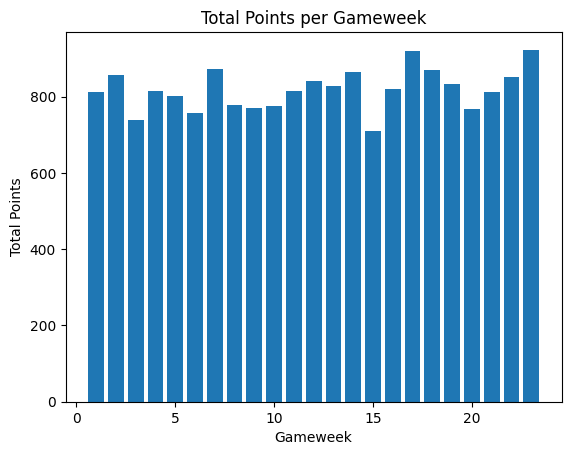

In [ ]:
# plot a bar chart of total points per gameweek to inspect how the total_points column differs per gameweek
gameweek_total_points = df.groupby('GW').sum(numeric_only=True)[['total_points']]

print(gameweek_total_points, "\n")

plt.bar(x=gameweek_total_points.index, height=gameweek_total_points['total_points'])

plt.title('Total Points per Gameweek')
plt.xlabel('Gameweek')
plt.ylabel('Total Points')
plt.show()

Analysing this plot, it appears the total points stays quite consistent on a week-by-week basis. However, there appears to be a slump in the total points for gameweek 15 in comparison to the other gameweeks. I will therefore inspect this further.

It is common for some gameweeks to have less games than others due to postponements in games. Therefore, firstly I will inspect the number of games played each gameweek.

In [55]:
# count the number of unique fixtures per gameweek to see if any gameweek is missing a fixture - all gameweeks should have 10 fixtures in a normal week
df.groupby('GW').nunique()[['fixture']].rename(columns={'fixture' : 'unique_fixtures'})

,unique_fixtures
GW,
1,10
2,10
3,10
4,10
5,10
6,10
7,10
8,10
9,10


We can see that gameweek 15 does in fact have less fixtures than other weeks, explaining the difference in total_points for that gameweek. Looking into this further, it is due to one of the fixtures being postponed due to weather conditions, so this is expected to be seen in the data.

                total_points
team                        
Southampton              637
Ipswich                  691
Leicester                714
Wolves                   804
West Ham                 825
Everton                  859
Aston Villa              892
Crystal Palace           916
Man Utd                  922
Fulham                   947
Brentford                954
Brighton                 956
Spurs                    979
Chelsea                 1023
Man City                1049
Nott'm Forest           1083
Bournemouth             1096
Newcastle               1108
Arsenal                 1119
Liverpool               1257 



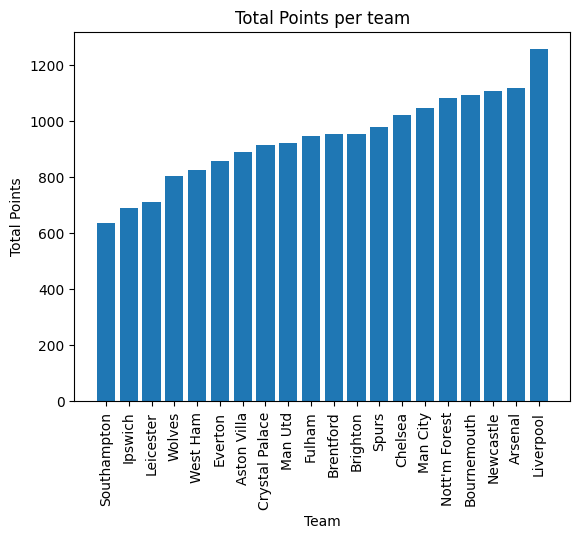

In [ ]:
# plot and inspect the total points per team
gameweek_total_points = df.groupby('team').sum(numeric_only=True)[['total_points']].sort_values(by='total_points', ascending=True)

print(gameweek_total_points, "\n")

plt.bar(x=gameweek_total_points.index, height=gameweek_total_points['total_points'])

plt.title('Total Points per team')
plt.xlabel('Team')
plt.ylabel('Total Points')
plt.xticks(rotation=90)
plt.show()

### Data Cleaning/Preprocessing

In [11]:
# Create a team ID, team Name dictionary using a dictionary comprehension and enumerate function
# Enumerate function prints the values and their index, starting from 0 unless specified (here it is specified to start at 1)
teams_id_dict = {id : team for id, team in enumerate(df['team'].sort_values().unique(), 1)}
teams_id_dict

{1: 'Arsenal',
 2: 'Aston Villa',
 3: 'Bournemouth',
 4: 'Brentford',
 5: 'Brighton',
 6: 'Chelsea',
 7: 'Crystal Palace',
 8: 'Everton',
 9: 'Fulham',
 10: 'Ipswich',
 11: 'Leicester',
 12: 'Liverpool',
 13: 'Man City',
 14: 'Man Utd',
 15: 'Newcastle',
 16: "Nott'm Forest",
 17: 'Southampton',
 18: 'Spurs',
 19: 'West Ham',
 20: 'Wolves'}

In [12]:
# Create a new column which gives the name of the opponent team, rather than using the ID
df['opponent'] = df['opponent_team'].map(teams_id_dict)

In [13]:
df = df.rename(columns={'goals_scored' : 'goals',
                        'expected_goals' : 'xG',
                        'expected_assists' : 'xA',
                        'expected_goal_involvements' : 'xGI',
                        'goals_conceded' : 'GC',
                        'expected_goals_conceded' : 'xGC',
                        'total_points' : 'points'})

In [14]:
# remove rows where the player played no minutes
df = df.loc[(df['minutes'] > 0)].reset_index(drop=True).copy()

In [17]:
# save dataframe to csv to be used in fdr rating notebook
#df.to_csv('cleaned_data.csv', index=False)

In [15]:
max_gameweek = df['GW'].max()
print("max_gameweek:", max_gameweek)

min_gameweek = df['GW'].min()
print("min_gameweek:", min_gameweek)

training_gameweek_threshold = round(max_gameweek * 0.8)
print("training_gameweek_threshold:", training_gameweek_threshold)

max_gameweek: 23
min_gameweek: 1
training_gameweek_threshold: 18


**Potential Issue** - my test dataset contains some information coming from the training dataset --> potentially causing data leakage issue.

Previously, aggregated stats were calculated off of both training and test data, as it aggregates data for the entire season. Therefore there is some training data in the test data, and vice versa.

Therefore, I need to calculate these aggregated stats AFTER splitting into training and testing data ?

Do I have to randomly select training and testing data, so that it can be data from any gameweek and fixture - can I just take the first x gameweeks as the training data, and the last y gameweeks as the test data?

Here I am splitting the data into training and test based on the gameweek rather than using the train_test_split function as the split should not be done with a shuffle and should take the gameweek into account as the data is time dependent and this will mimic how it is in real life where the new data to run the model will be future data and based off of prior data.

I am doing the train and test data split now before calculating aggregation statistics to avoid data leakage.

In [16]:
training_df = df.loc[(df['GW'] <= training_gameweek_threshold)].copy()
testing_df = df.loc[(df['GW'] > training_gameweek_threshold)].copy()

### Teams Stats Tables

Gameweek Team Stats

In [17]:
training_df.head()

,GW,round,fixture,name,position,team,opponent_team,starts,minutes,goals,xG,assists,xA,xGI,GC,xGC,clean_sheets,own_goals,yellow_cards,red_cards,penalties_missed,saves,penalties_saved,was_home,points,bonus,opponent
0,1,1,6,Alex Scott,MID,Bournemouth,16,1,62,0,0.0,0,0.01,0.01,1,1.02,0,0,0,0,0,0,0,False,2,0,Nott'm Forest
1,1,1,5,Ben Brereton Díaz,MID,Southampton,15,1,70,0,0.3,0,0.02,0.32,1,0.25,0,0,1,0,0,0,0,False,1,0,Newcastle
2,1,1,7,Pau Torres,DEF,Aston Villa,19,1,90,0,0.0,0,0.01,0.01,1,2.46,0,0,0,0,0,0,0,False,2,0,West Ham
3,1,1,2,Hwang Hee-chan,MID,Wolves,1,1,90,0,0.0,0,0.11,0.11,2,1.24,0,0,0,0,0,0,0,False,2,0,Arsenal
4,1,1,2,João Victor Gomes da Silva,MID,Wolves,1,1,83,0,0.0,0,0.02,0.02,2,1.24,0,0,1,0,0,0,0,False,1,0,Arsenal


In [22]:
gw_team_grouped = training_df.groupby(['GW', 'round', 'fixture', 'team', 'opponent']).aggregate({'goals': 'sum',
                                                                                        'xG': 'sum',
                                                                                        'was_home': 'max'}).reset_index()
gw_team_grouped

,GW,round,fixture,team,opponent,goals,xG,was_home
0,1,1,1,Fulham,Man Utd,0,0.44,False
1,1,1,1,Man Utd,Fulham,1,2.43,True
2,1,1,2,Arsenal,Wolves,2,1.26,True
3,1,1,2,Wolves,Arsenal,0,0.48,False
4,1,1,3,Brighton,Everton,3,1.44,False
...,...,...,...,...,...,...,...,...
353,18,18,178,Spurs,Nott'm Forest,0,0.91,False
354,18,18,179,Southampton,West Ham,0,1.41,True
355,18,18,179,West Ham,Southampton,1,1.82,False
356,18,18,180,Man Utd,Wolves,0,0.45,False


Join the grouped DataFrame with itself to get the stats of the opponent team such as goals conceded, expected goals conceded - do not sum these columns on a player basis as each player will have the total goals conceded and xGC they faced specifically and does not reflect the entire team, plus players who got subbed off early may have lower stats that what the entire team should get

In [23]:
# join the grouped df with itself to get the stats of the opponent team, which will give the goals conceded, xGC, etc. of the team in question
gw_team_stats_merged = pd.merge(gw_team_grouped,
                         gw_team_grouped,
                         how='left',
                         left_on=['GW', 'round', 'fixture', 'team'],
                         right_on=['GW', 'round', 'fixture', 'opponent'],
                         suffixes=('', '_opponent'))
gw_team_stats_merged

,GW,round,fixture,team,opponent,goals,xG,was_home,team_opponent,opponent_opponent,goals_opponent,xG_opponent,was_home_opponent
0,1,1,1,Fulham,Man Utd,0,0.44,False,Man Utd,Fulham,1,2.43,True
1,1,1,1,Man Utd,Fulham,1,2.43,True,Fulham,Man Utd,0,0.44,False
2,1,1,2,Arsenal,Wolves,2,1.26,True,Wolves,Arsenal,0,0.48,False
3,1,1,2,Wolves,Arsenal,0,0.48,False,Arsenal,Wolves,2,1.26,True
4,1,1,3,Brighton,Everton,3,1.44,False,Everton,Brighton,0,0.46,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,18,18,178,Spurs,Nott'm Forest,0,0.91,False,Nott'm Forest,Spurs,1,1.12,True
354,18,18,179,Southampton,West Ham,0,1.41,True,West Ham,Southampton,1,1.82,False
355,18,18,179,West Ham,Southampton,1,1.82,False,Southampton,West Ham,0,1.41,True
356,18,18,180,Man Utd,Wolves,0,0.45,False,Wolves,Man Utd,2,0.86,True


In [24]:
gw_team_stats_sliced = gw_team_stats_merged[['GW', 'round', 'fixture', 'team', 'goals','xG', 'was_home',
                                      'goals_opponent', 'xG_opponent', 'opponent']].copy()

team_stats_per_gw = gw_team_stats_sliced.rename(columns={'goals_opponent': 'GC',
                                                         'xG_opponent': 'xGC'})
team_stats_per_gw

,GW,round,fixture,team,goals,xG,was_home,GC,xGC,opponent
0,1,1,1,Fulham,0,0.44,False,1,2.43,Man Utd
1,1,1,1,Man Utd,1,2.43,True,0,0.44,Fulham
2,1,1,2,Arsenal,2,1.26,True,0,0.48,Wolves
3,1,1,2,Wolves,0,0.48,False,2,1.26,Arsenal
4,1,1,3,Brighton,3,1.44,False,0,0.46,Everton
...,...,...,...,...,...,...,...,...,...,...
353,18,18,178,Spurs,0,0.91,False,1,1.12,Nott'm Forest
354,18,18,179,Southampton,0,1.41,True,1,1.82,West Ham
355,18,18,179,West Ham,1,1.82,False,0,1.41,Southampton
356,18,18,180,Man Utd,0,0.45,False,2,0.86,Wolves


In [25]:
# create a new column for clean sheets
team_stats_per_gw['CS'] = np.where(team_stats_per_gw['GC'] == 0, 1, 0)

# create a new column for whether they won the match or not
team_stats_per_gw['match_won'] = np.where(team_stats_per_gw['goals'] > team_stats_per_gw['GC'], 1, 0)

team_stats_per_gw

,GW,round,fixture,team,goals,xG,was_home,GC,xGC,opponent,CS,match_won
0,1,1,1,Fulham,0,0.44,False,1,2.43,Man Utd,0,0
1,1,1,1,Man Utd,1,2.43,True,0,0.44,Fulham,1,1
2,1,1,2,Arsenal,2,1.26,True,0,0.48,Wolves,1,1
3,1,1,2,Wolves,0,0.48,False,2,1.26,Arsenal,0,0
4,1,1,3,Brighton,3,1.44,False,0,0.46,Everton,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
353,18,18,178,Spurs,0,0.91,False,1,1.12,Nott'm Forest,0,0
354,18,18,179,Southampton,0,1.41,True,1,1.82,West Ham,0,0
355,18,18,179,West Ham,1,1.82,False,0,1.41,Southampton,1,1
356,18,18,180,Man Utd,0,0.45,False,2,0.86,Wolves,0,0


In [26]:
team_total_stats = team_stats_per_gw.groupby('team').agg({'goals' : 'sum',
                                                         'xG' : 'sum',
                                                         'GC' : 'sum',
                                                         'xGC' : 'sum',
                                                         'CS' : 'sum',
                                                         'fixture' : 'count',
                                                         'match_won' : 'sum'}).reset_index()

team_total_stats = team_total_stats.rename(columns={'fixture' : 'games_played',
                                                    'match_won' : 'games_won'})

team_total_stats

,team,goals,xG,GC,xGC,CS,games_played,games_won
0,Arsenal,34,32.28,16,16.20,7,18,10
1,Aston Villa,25,28.16,29,23.38,2,18,8
2,Bournemouth,27,35.31,21,22.97,4,18,8
3,Brentford,31,27.46,31,30.60,3,18,6
4,Brighton,26,25.69,25,27.87,4,18,6
5,Chelsea,38,36.48,21,25.70,4,18,10
6,Crystal Palace,17,24.57,24,27.04,6,18,4
7,Everton,13,16.85,22,23.08,7,17,3
8,Fulham,25,24.52,22,21.69,3,18,7
9,Ipswich,15,16.51,32,38.17,1,18,1


Need to make all stats on a **per game** basis as Everton and Liverpool have played 1 game less.

Potentially make stats on a **per home/away game** basis so that it can be ranked fairly instead of doing total_home/total_away

In [27]:
stats_columns = ['goals', 'xG', 'GC', 'xGC', 'CS', 'games_won']

for column in stats_columns:
    team_total_stats[f'{column}_pg'] = round(team_total_stats[column] / team_total_stats['games_played'], 2)

team_total_stats

,team,goals,xG,GC,xGC,CS,games_played,games_won,goals_pg,xG_pg,GC_pg,xGC_pg,CS_pg,games_won_pg
0,Arsenal,34,32.28,16,16.20,7,18,10,1.89,1.79,0.89,0.90,0.39,0.56
1,Aston Villa,25,28.16,29,23.38,2,18,8,1.39,1.56,1.61,1.30,0.11,0.44
2,Bournemouth,27,35.31,21,22.97,4,18,8,1.50,1.96,1.17,1.28,0.22,0.44
3,Brentford,31,27.46,31,30.60,3,18,6,1.72,1.53,1.72,1.70,0.17,0.33
4,Brighton,26,25.69,25,27.87,4,18,6,1.44,1.43,1.39,1.55,0.22,0.33
5,Chelsea,38,36.48,21,25.70,4,18,10,2.11,2.03,1.17,1.43,0.22,0.56
6,Crystal Palace,17,24.57,24,27.04,6,18,4,0.94,1.36,1.33,1.50,0.33,0.22
7,Everton,13,16.85,22,23.08,7,17,3,0.76,0.99,1.29,1.36,0.41,0.18
8,Fulham,25,24.52,22,21.69,3,18,7,1.39,1.36,1.22,1.20,0.17,0.39
9,Ipswich,15,16.51,32,38.17,1,18,1,0.83,0.92,1.78,2.12,0.06,0.06


In [28]:
# extract only the per game columns
per_game_totals_columns = [column for column in team_total_stats.columns if '_pg' in column]
per_game_totals_df = team_total_stats[per_game_totals_columns].copy()
per_game_totals_df = per_game_totals_df.set_index(team_total_stats['team'])
per_game_totals_df

,goals_pg,xG_pg,GC_pg,xGC_pg,CS_pg,games_won_pg
team,,,,,,
Arsenal,1.89,1.79,0.89,0.90,0.39,0.56
Aston Villa,1.39,1.56,1.61,1.30,0.11,0.44
Bournemouth,1.50,1.96,1.17,1.28,0.22,0.44
Brentford,1.72,1.53,1.72,1.70,0.17,0.33
Brighton,1.44,1.43,1.39,1.55,0.22,0.33
Chelsea,2.11,2.03,1.17,1.43,0.22,0.56
Crystal Palace,0.94,1.36,1.33,1.50,0.33,0.22
Everton,0.76,0.99,1.29,1.36,0.41,0.18
Fulham,1.39,1.36,1.22,1.20,0.17,0.39


### Player Stats Tables

Should make a stats per GW dataframe as will need this for future predictions, as well as a total table for each player

In [29]:
fpl_players = training_df.copy()
fpl_players.head()

,GW,round,fixture,name,position,team,opponent_team,starts,minutes,goals,xG,assists,xA,xGI,GC,xGC,clean_sheets,own_goals,yellow_cards,red_cards,penalties_missed,saves,penalties_saved,was_home,points,bonus,opponent
0,1,1,6,Alex Scott,MID,Bournemouth,16,1,62,0,0.0,0,0.01,0.01,1,1.02,0,0,0,0,0,0,0,False,2,0,Nott'm Forest
1,1,1,5,Ben Brereton Díaz,MID,Southampton,15,1,70,0,0.3,0,0.02,0.32,1,0.25,0,0,1,0,0,0,0,False,1,0,Newcastle
2,1,1,7,Pau Torres,DEF,Aston Villa,19,1,90,0,0.0,0,0.01,0.01,1,2.46,0,0,0,0,0,0,0,False,2,0,West Ham
3,1,1,2,Hwang Hee-chan,MID,Wolves,1,1,90,0,0.0,0,0.11,0.11,2,1.24,0,0,0,0,0,0,0,False,2,0,Arsenal
4,1,1,2,João Victor Gomes da Silva,MID,Wolves,1,1,83,0,0.0,0,0.02,0.02,2,1.24,0,0,1,0,0,0,0,False,1,0,Arsenal


In [30]:
fpl_players['appearance'] = np.where(fpl_players['minutes'] > 0, 1, 0)

In [31]:
fpl_players['GI'] = fpl_players['goals'] + fpl_players['assists']

In [32]:
# should maybe make fields for home and away for all player stats too
# maybe in the final table I can have a column for the coalesce of home or away stats depending on the fixture, as well as the total stat

In [33]:
# Include stats for the previous 6 games to show form maybe? Might be useful for predicting future performance
# This will be done by grouping the data by player and then using the rolling function to get the sum of the previous 6 games

In [34]:
fpl_players.head(2)

,GW,round,fixture,name,position,team,opponent_team,starts,minutes,goals,xG,assists,xA,xGI,GC,xGC,clean_sheets,own_goals,yellow_cards,red_cards,penalties_missed,saves,penalties_saved,was_home,points,bonus,opponent,appearance,GI
0,1,1,6,Alex Scott,MID,Bournemouth,16,1,62,0,0.0,0,0.01,0.01,1,1.02,0,0,0,0,0,0,0,False,2,0,Nott'm Forest,1,0
1,1,1,5,Ben Brereton Díaz,MID,Southampton,15,1,70,0,0.3,0,0.02,0.32,1,0.25,0,0,1,0,0,0,0,False,1,0,Newcastle,1,0


**Need to start using total points, points per game and use a rolling last 5/6 games for some stats like points or goals or GI or whatever to make better predictions**

In [35]:
player_fields = ['appearance','starts','minutes','goals','xG', 'assists','xA', 'GI', 'xGI', 'GC','xGC', 'clean_sheets', 'own_goals',
                 'yellow_cards', 'red_cards', 'penalties_missed','saves', 'penalties_saved', 'bonus','points']
# CAUTION - xGI and GI will be highly correlated with goals and assists, so maybe remove this

In [36]:
player_stats = fpl_players.groupby(['name', 'team', 'position']).sum()[player_fields].reset_index()
player_stats.head(10)

,name,team,position,appearance,starts,minutes,goals,xG,assists,xA,GI,xGI,GC,xGC,clean_sheets,own_goals,yellow_cards,red_cards,penalties_missed,saves,penalties_saved,bonus,points
0,Aaron Cresswell,West Ham,DEF,6,0,50,0,0.03,0,0.10,0,0.13,0,1.51,0,0,1,0,0,0,0,0,5
1,Aaron Ramsdale,Southampton,GK,11,11,990,0,0.00,0,0.01,0,0.01,20,23.18,2,0,1,0,0,42,0,5,38
2,Aaron Wan-Bissaka,West Ham,DEF,17,16,1444,2,0.76,1,1.28,3,2.04,28,28.32,3,0,0,0,0,0,0,6,58
3,Abdoulaye Doucouré,Everton,MID,15,14,1162,0,0.61,0,0.48,0,1.09,15,17.73,7,0,0,0,0,0,0,0,35
4,Abdul Fatawu,Leicester,MID,11,6,576,0,0.41,2,1.42,2,1.83,14,11.00,0,0,0,0,0,0,0,3,26
5,Adam Armstrong,Southampton,FWD,15,12,1014,2,3.09,2,0.52,4,3.61,20,23.62,2,0,4,0,1,0,0,2,36
6,Adam Lallana,Southampton,MID,9,5,315,0,0.15,2,0.48,2,0.63,5,5.69,0,0,4,0,0,0,0,1,12
7,Adam Smith,Bournemouth,DEF,17,12,1032,0,0.60,0,0.10,0,0.70,13,12.51,3,0,4,0,0,0,0,0,34
8,Adam Webster,Brighton,DEF,3,2,78,0,0.00,0,0.03,0,0.03,4,3.95,0,0,0,0,0,0,0,0,1
9,Adam Wharton,Crystal Palace,MID,8,8,621,0,0.22,0,0.60,0,0.82,9,9.39,1,0,0,0,0,0,0,0,15


In [37]:
per_game_cols = ["starts", "minutes", "goals", "xG", "assists", "xA", "GI", "xGI", "GC", "xGC", "clean_sheets", "own_goals", "yellow_cards",
                 "red_cards", "penalties_missed", "saves", "penalties_saved", "points"]

for column in per_game_cols:
    #player_stats[column + "_p90"] = round((player_stats[column]/player_stats["minutes"])*90, 2) # don't think I want to use per 90 stats
    player_stats[column + "_pg"] = round((player_stats[column]/player_stats["appearance"]), 2)

player_stats.head()

,name,team,position,appearance,starts,minutes,goals,xG,assists,xA,GI,xGI,GC,xGC,clean_sheets,own_goals,yellow_cards,red_cards,penalties_missed,saves,penalties_saved,bonus,points,starts_pg,minutes_pg,goals_pg,xG_pg,assists_pg,xA_pg,GI_pg,xGI_pg,GC_pg,xGC_pg,clean_sheets_pg,own_goals_pg,yellow_cards_pg,red_cards_pg,penalties_missed_pg,saves_pg,penalties_saved_pg,points_pg
0,Aaron Cresswell,West Ham,DEF,6,0,50,0,0.03,0,0.10,0,0.13,0,1.51,0,0,1,0,0,0,0,0,5,0.00,8.33,0.00,0.00,0.00,0.02,0.00,0.02,0.00,0.25,0.00,0.0,0.17,0.0,0.0,0.00,0.0,0.83
1,Aaron Ramsdale,Southampton,GK,11,11,990,0,0.00,0,0.01,0,0.01,20,23.18,2,0,1,0,0,42,0,5,38,1.00,90.00,0.00,0.00,0.00,0.00,0.00,0.00,1.82,2.11,0.18,0.0,0.09,0.0,0.0,3.82,0.0,3.45
2,Aaron Wan-Bissaka,West Ham,DEF,17,16,1444,2,0.76,1,1.28,3,2.04,28,28.32,3,0,0,0,0,0,0,6,58,0.94,84.94,0.12,0.04,0.06,0.08,0.18,0.12,1.65,1.67,0.18,0.0,0.00,0.0,0.0,0.00,0.0,3.41
3,Abdoulaye Doucouré,Everton,MID,15,14,1162,0,0.61,0,0.48,0,1.09,15,17.73,7,0,0,0,0,0,0,0,35,0.93,77.47,0.00,0.04,0.00,0.03,0.00,0.07,1.00,1.18,0.47,0.0,0.00,0.0,0.0,0.00,0.0,2.33
4,Abdul Fatawu,Leicester,MID,11,6,576,0,0.41,2,1.42,2,1.83,14,11.00,0,0,0,0,0,0,0,3,26,0.55,52.36,0.00,0.04,0.18,0.13,0.18,0.17,1.27,1.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,2.36


In [38]:
player_stats = player_stats.rename(columns={'appearance' : 'total_appearances',
                                            'starts' : 'total_starts',
                                            'minutes' : 'total_minutes',
                                            'goals' : 'total_goals',
                                            'xG' : 'total_xG',
                                            'assists' : 'total_assists',
                                            'xA' : 'total_xA',
                                            'GI' : 'total_GI',
                                            'xGI' : 'total_xGI',
                                            'GC' : 'total_GC',
                                            'xGC' : 'total_xGC',
                                            'clean_sheets' : 'total_CS',
                                            'own_goals' : 'total_own_goals',
                                            'yellow_cards' : 'total_yellow_cards',
                                            'red_cards' : 'total_red_cards',
                                            'penalties_missed' : 'total_penalties_missed',
                                            'saves' : 'total_saves',
                                            'penalties_saved' : 'total_penalties_saved',
                                            'bonus' : 'total_bonus',
                                            'points' : 'total_points'})
player_stats.head()

,name,team,position,total_appearances,total_starts,total_minutes,total_goals,total_xG,total_assists,total_xA,total_GI,total_xGI,total_GC,total_xGC,total_CS,total_own_goals,total_yellow_cards,total_red_cards,total_penalties_missed,total_saves,total_penalties_saved,total_bonus,total_points,starts_pg,minutes_pg,goals_pg,xG_pg,assists_pg,xA_pg,GI_pg,xGI_pg,GC_pg,xGC_pg,clean_sheets_pg,own_goals_pg,yellow_cards_pg,red_cards_pg,penalties_missed_pg,saves_pg,penalties_saved_pg,points_pg
0,Aaron Cresswell,West Ham,DEF,6,0,50,0,0.03,0,0.10,0,0.13,0,1.51,0,0,1,0,0,0,0,0,5,0.00,8.33,0.00,0.00,0.00,0.02,0.00,0.02,0.00,0.25,0.00,0.0,0.17,0.0,0.0,0.00,0.0,0.83
1,Aaron Ramsdale,Southampton,GK,11,11,990,0,0.00,0,0.01,0,0.01,20,23.18,2,0,1,0,0,42,0,5,38,1.00,90.00,0.00,0.00,0.00,0.00,0.00,0.00,1.82,2.11,0.18,0.0,0.09,0.0,0.0,3.82,0.0,3.45
2,Aaron Wan-Bissaka,West Ham,DEF,17,16,1444,2,0.76,1,1.28,3,2.04,28,28.32,3,0,0,0,0,0,0,6,58,0.94,84.94,0.12,0.04,0.06,0.08,0.18,0.12,1.65,1.67,0.18,0.0,0.00,0.0,0.0,0.00,0.0,3.41
3,Abdoulaye Doucouré,Everton,MID,15,14,1162,0,0.61,0,0.48,0,1.09,15,17.73,7,0,0,0,0,0,0,0,35,0.93,77.47,0.00,0.04,0.00,0.03,0.00,0.07,1.00,1.18,0.47,0.0,0.00,0.0,0.0,0.00,0.0,2.33
4,Abdul Fatawu,Leicester,MID,11,6,576,0,0.41,2,1.42,2,1.83,14,11.00,0,0,0,0,0,0,0,3,26,0.55,52.36,0.00,0.04,0.18,0.13,0.18,0.17,1.27,1.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,2.36


### Data Preparation for Model

When making predictions on future games, we will not have stats such as goals scored, assists, total points, xG, xA, xGI, etc. for the specific match as they did not happen. Therefore, these variables must be omitted so that there is no **data leakage (target leakage specifically) ->** Data leakage occurs when a model uses information during training that wouldn't be available at the time of prediction. The model will perform well in testing and validation, but when used in production, it becomes entirely inaccurate.

Therefore, only aggregated columns should be used and total points should be predicted based on the total player, team, and opponent stats.

In [39]:
fields_to_slice = ['GW', 'fixture', 'name', 'position', 'team', 'opponent', 'points']

model_training_df = training_df[fields_to_slice].copy()

# repeat for testing_df
model_testing_df = testing_df[fields_to_slice].copy()

In [40]:
# use per game stats for players to reduce bias towards players who have played more games
# keep the total_apperances column for the model so that the model can still take into account total games played for a player
# keep total_points column so the model uses total points as an indication for future points in a game
pg_player_stats = player_stats[['name', 'team', 'position', 'total_appearances', 'total_points','minutes_pg', 'goals_pg', 'xG_pg', 'assists_pg', 'xA_pg', 'GC_pg', 'xGC_pg',
                                'clean_sheets_pg', 'own_goals_pg', 'yellow_cards_pg', 'red_cards_pg','penalties_missed_pg', 'saves_pg', 'penalties_saved_pg', 'points_pg']].copy()

In [41]:
# add a minimum games played filter to remove players who have not played a certain amount of games
# this is to remove players who have played very few games and have a high points per game average because of small sample size
minimum_games_threshold = 5
pg_player_stats = pg_player_stats.loc[(pg_player_stats['total_appearances'] >= minimum_games_threshold)].reset_index(drop=True).copy()

In [42]:
# using an inner join to only include players who have played a minimum amount of games
# this is because players who have played less games will have a higher bias towards their per game stats

player_stats_train = pd.merge(model_training_df, pg_player_stats, how='inner', on=['name', 'team', 'position'], suffixes=(None, '_player'))

# repeat for testing_df
player_stats_test = pd.merge(model_testing_df, pg_player_stats, how='inner', on=['name', 'team', 'position'], suffixes=(None, '_player'))

In [43]:
# need to use per game stats for teams because not all teams have played equal number of games
pg_team_stats = team_total_stats[['team', 'goals_pg', 'xG_pg', 'GC_pg', 'xGC_pg', 'CS_pg', 'games_won_pg']].copy()

In [44]:
player_team_train = pd.merge(player_stats_train, pg_team_stats, how='left', left_on='team', right_on='team', suffixes=(None, '_team'))

# repeat for testing_df
player_team_test = pd.merge(player_stats_test, pg_team_stats, how='left', left_on='team', right_on='team', suffixes=(None, '_team'))

In [45]:
# join the pg_team_stats dataframe on opponent to get the opponent stats for each fixture
player_team_opp_train = pd.merge(player_team_train, pg_team_stats, how='left', left_on='opponent', right_on='team', suffixes=(None, '_opponent'))

# repeat for testing_df
player_team_opp_test = pd.merge(player_team_test, pg_team_stats, how='left', left_on='opponent', right_on='team', suffixes=(None, '_opponent'))

In [46]:
# remove unnecessary columns
player_team_opp_train = player_team_opp_train.drop(columns=["fixture", "team_opponent"])
player_team_opp_test = player_team_opp_test.drop(columns=["fixture", "team_opponent"])

In [47]:
# set the index of the df as the indentifier columns so I can map the predicted points to a player for a fixture
final_train_df = player_team_opp_train.set_index(["GW", "name", "position", "team", "opponent"], drop=True)
final_test_df = player_team_opp_test.set_index(["GW", "name", "position", "team", "opponent"], drop=True)

# this should be the final dataframe to use for the modelling
final_train_df

,,,,,points,total_appearances,total_points,minutes_pg,goals_pg,xG_pg,assists_pg,xA_pg,GC_pg,xGC_pg,clean_sheets_pg,own_goals_pg,yellow_cards_pg,red_cards_pg,penalties_missed_pg,saves_pg,penalties_saved_pg,points_pg,goals_pg_team,xG_pg_team,GC_pg_team,xGC_pg_team,CS_pg,games_won_pg,goals_pg_opponent,xG_pg_opponent,GC_pg_opponent,xGC_pg_opponent,CS_pg_opponent,games_won_pg_opponent
GW,name,position,team,opponent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Alex Scott,MID,Bournemouth,Nott'm Forest,2,8,11,32.25,0.0,0.02,0.0,0.02,0.38,0.46,0.12,0.0,0.0,0.0,0.0,0.0,0.0,1.38,1.50,1.96,1.17,1.28,0.22,0.44,1.33,1.24,1.06,1.07,0.39,0.56
2,Alex Scott,MID,Bournemouth,Newcastle,1,8,11,32.25,0.0,0.02,0.0,0.02,0.38,0.46,0.12,0.0,0.0,0.0,0.0,0.0,0.0,1.38,1.50,1.96,1.17,1.28,0.22,0.44,1.61,1.68,1.11,1.22,0.39,0.44
3,Alex Scott,MID,Bournemouth,Everton,1,8,11,32.25,0.0,0.02,0.0,0.02,0.38,0.46,0.12,0.0,0.0,0.0,0.0,0.0,0.0,1.38,1.50,1.96,1.17,1.28,0.22,0.44,0.76,0.99,1.29,1.36,0.41,0.18
4,Alex Scott,MID,Bournemouth,Chelsea,1,8,11,32.25,0.0,0.02,0.0,0.02,0.38,0.46,0.12,0.0,0.0,0.0,0.0,0.0,0.0,1.38,1.50,1.96,1.17,1.28,0.22,0.44,2.11,2.03,1.17,1.43,0.22,0.56
5,Alex Scott,MID,Bournemouth,Liverpool,1,8,11,32.25,0.0,0.02,0.0,0.02,0.38,0.46,0.12,0.0,0.0,0.0,0.0,0.0,0.0,1.38,1.50,1.96,1.17,1.28,0.22,0.44,2.35,2.25,1.00,0.97,0.41,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,Nathan Wood-Gordon,DEF,Southampton,Chelsea,0,5,11,87.00,0.0,0.05,0.0,0.01,1.80,2.36,0.20,0.0,0.4,0.0,0.0,0.0,0.0,2.20,0.61,1.05,2.06,2.28,0.11,0.06,2.11,2.03,1.17,1.43,0.22,0.56
15,Nathan Wood-Gordon,DEF,Southampton,Aston Villa,1,5,11,87.00,0.0,0.05,0.0,0.01,1.80,2.36,0.20,0.0,0.4,0.0,0.0,0.0,0.0,2.20,0.61,1.05,2.06,2.28,0.11,0.06,1.39,1.56,1.61,1.30,0.11,0.44
16,Nathan Wood-Gordon,DEF,Southampton,Spurs,1,5,11,87.00,0.0,0.05,0.0,0.01,1.80,2.36,0.20,0.0,0.4,0.0,0.0,0.0,0.0,2.20,0.61,1.05,2.06,2.28,0.11,0.06,2.06,1.87,1.44,1.67,0.22,0.39


Split the dataset into new dataframes by positions, as points are awarded differently depending on the position, and some stats are more relevant to some positions

In [48]:
def get_position_df(df, position):

    # filter the dataframe by position
    df = df.loc[(df.index.get_level_values('position') == position)].copy()

    # get the per game stats for players, stats dependent on position
    if position == "FWD":
        # drop columns which do not contribute to FWD points
        df = df.drop(columns=["GC_pg", "xGC_pg", "clean_sheets_pg", "saves_pg", "penalties_saved_pg"])
    elif position != "GK":
        # drop columns which do not contribute to DEF or MID points
        df = df.drop(columns=["saves_pg", "penalties_saved_pg"])
    else:
        # drop columns which do not contribute to GK points
        df = df.drop(columns=["goals_pg", "xG_pg", "assists_pg", "xA_pg", "penalties_missed_pg"])

    return df

In [49]:
df_gk_train = get_position_df(final_train_df, "GK")
df_gk_test = get_position_df(final_test_df, "GK")


df_def_train = get_position_df(final_train_df, "DEF")
df_def_test = get_position_df(final_test_df, "DEF")

df_mid_train = get_position_df(final_train_df, "MID")
df_mid_test = get_position_df(final_test_df, "MID")

df_fwd_train = get_position_df(final_train_df, "FWD")
df_fwd_test = get_position_df(final_test_df, "FWD")

df_fwd_train

,,,,,points,total_appearances,total_points,minutes_pg,goals_pg,xG_pg,assists_pg,xA_pg,own_goals_pg,yellow_cards_pg,red_cards_pg,penalties_missed_pg,points_pg,goals_pg_team,xG_pg_team,GC_pg_team,xGC_pg_team,CS_pg,games_won_pg,goals_pg_opponent,xG_pg_opponent,GC_pg_opponent,xGC_pg_opponent,CS_pg_opponent,games_won_pg_opponent
GW,name,position,team,opponent,,,,,,,,,,,,,,,,,,,,,,,,,
1,Chris Wood,FWD,Nott'm Forest,Bournemouth,9,18,94,78.33,0.56,0.36,0.0,0.01,0.0,0.06,0.0,0.0,5.22,1.33,1.24,1.06,1.07,0.39,0.56,1.50,1.96,1.17,1.28,0.22,0.44
2,Chris Wood,FWD,Nott'm Forest,Southampton,1,18,94,78.33,0.56,0.36,0.0,0.01,0.0,0.06,0.0,0.0,5.22,1.33,1.24,1.06,1.07,0.39,0.56,0.61,1.05,2.06,2.28,0.11,0.06
3,Chris Wood,FWD,Nott'm Forest,Wolves,9,18,94,78.33,0.56,0.36,0.0,0.01,0.0,0.06,0.0,0.0,5.22,1.33,1.24,1.06,1.07,0.39,0.56,1.61,1.05,2.06,1.58,0.17,0.22
4,Chris Wood,FWD,Nott'm Forest,Liverpool,2,18,94,78.33,0.56,0.36,0.0,0.01,0.0,0.06,0.0,0.0,5.22,1.33,1.24,1.06,1.07,0.39,0.56,2.35,2.25,1.00,0.97,0.41,0.76
5,Chris Wood,FWD,Nott'm Forest,Brighton,8,18,94,78.33,0.56,0.36,0.0,0.01,0.0,0.06,0.0,0.0,5.22,1.33,1.24,1.06,1.07,0.39,0.56,1.44,1.43,1.39,1.55,0.22,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,Patson Daka,FWD,Leicester,Brentford,1,6,13,32.83,0.17,0.04,0.0,0.00,0.0,0.00,0.0,0.0,2.17,1.22,0.99,2.11,2.08,0.06,0.17,1.72,1.53,1.72,1.70,0.17,0.33
14,Patson Daka,FWD,Leicester,West Ham,7,6,13,32.83,0.17,0.04,0.0,0.00,0.0,0.00,0.0,0.0,2.17,1.22,0.99,2.11,2.08,0.06,0.17,1.22,1.53,1.61,1.75,0.22,0.33
15,Patson Daka,FWD,Leicester,Brighton,1,6,13,32.83,0.17,0.04,0.0,0.00,0.0,0.00,0.0,0.0,2.17,1.22,0.99,2.11,2.08,0.06,0.17,1.44,1.43,1.39,1.55,0.22,0.33


### Modelling

In [50]:
# import packages
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [108]:
def linear_regression_modelling(train_df, test_df):

    # split the data into features and target
    X_train = train_df.drop(columns=["points"]).copy()
    y_train = train_df["points"].copy()

    X_test = test_df.drop(columns=["points"]).copy()
    y_test = test_df["points"].copy()

    # scale the data
    scaler = StandardScaler()
    scaler_fitted = scaler.fit(X_train)
    X_train_scaled = scaler_fitted.transform(X_train)
    X_test_scaled = scaler_fitted.transform(X_test)

    # fit the model
    linear_regression = LinearRegression()
    linear_regression.fit(X_train_scaled, y_train)

    # show the coefficients of the model
    coefficients_df = pd.DataFrame(data=linear_regression.coef_, index=X_train.columns, columns=['Coefficient'])
    print(coefficients_df, "\n")

    # predict the points
    y_pred_train = linear_regression.predict(X_train_scaled)
    y_pred_test = linear_regression.predict(X_test_scaled)

    # print the metrics
    print("Training Metrics:")
    print("Training R-Squared:", metrics.r2_score(y_train, y_pred_train))
    print("Training Mean Absolute Error:", metrics.mean_absolute_error(y_train, y_pred_train))
    print("Training Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)), "\n")

    print("Testing Metrics:")
    print("Testing R-Squared:", metrics.r2_score(y_test, y_pred_test))
    print("Testing Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_test))
    print("Testing Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

    # create a DataFrame to return the predicted results vs. the actual
    results_df_train = pd.DataFrame({'GW' : train_df.index.get_level_values('GW'),
                              "name" : train_df.index.get_level_values('name'),
                              "position" : train_df.index.get_level_values('position'),
                              "team" : train_df.index.get_level_values('team'),
                              "opponent" : train_df.index.get_level_values('opponent'),
                              "points" : train_df['points'].values,
                              "predicted_points" : y_pred_train})
    results_df_train["difference"] = results_df_train["points"] - results_df_train["predicted_points"]
    results_df_train["dataset"] = "train"

    results_df_test = pd.DataFrame({'GW' : test_df.index.get_level_values('GW'),
                              "name" : test_df.index.get_level_values('name'),
                              "position" : test_df.index.get_level_values('position'),
                              "team" : test_df.index.get_level_values('team'),
                              "opponent" : test_df.index.get_level_values('opponent'),
                              "points" : test_df['points'].values,
                              "predicted_points" : y_pred_test})
    results_df_test["difference"] = results_df_test["points"] - results_df_test["predicted_points"]
    results_df_test["dataset"] = "test"

    results_df = pd.concat([results_df_train, results_df_test])

    return results_df

Goalkeeper Modelling

In [109]:
gk_model_df = linear_regression_modelling(df_gk_train, df_gk_test)
gk_model_df

                        Coefficient
total_appearances      3.148428e-03
total_points           4.961630e-02
minutes_pg            -1.750658e-02
GC_pg                  2.804850e-01
xGC_pg                -5.250960e-02
clean_sheets_pg       -1.625551e-01
own_goals_pg          -3.610590e-03
yellow_cards_pg       -9.273338e-03
red_cards_pg           4.033232e-16
saves_pg              -1.293721e-01
penalties_saved_pg    -3.191136e-02
points_pg              9.075301e-01
goals_pg_team         -2.914893e-02
xG_pg_team             4.016146e-02
GC_pg_team            -1.871719e-01
xGC_pg_team            1.351070e-01
CS_pg                  5.436815e-02
games_won_pg           6.439970e-02
goals_pg_opponent     -9.610086e-01
xG_pg_opponent         7.565415e-01
GC_pg_opponent         2.401821e-01
xGC_pg_opponent       -2.183953e-01
CS_pg_opponent         2.564398e-01
games_won_pg_opponent -3.710417e-01 

Training Metrics:
Training R-Squared: 0.13235466669352947
Training Mean Absolute Error: 2.01134449

,GW,name,position,team,opponent,points,predicted_points,difference,dataset
0,1,José Malheiro de Sá,GK,Wolves,Arsenal,2,2.047905,-0.047905,train
1,2,José Malheiro de Sá,GK,Wolves,Chelsea,-1,1.542696,-2.542696,train
2,8,José Malheiro de Sá,GK,Wolves,Man City,2,2.548770,-0.548770,train
3,9,José Malheiro de Sá,GK,Wolves,Brighton,2,2.346770,-0.346770,train
4,10,José Malheiro de Sá,GK,Wolves,Crystal Palace,2,3.769063,-1.769063,train
...,...,...,...,...,...,...,...,...,...
72,23,Robert Sánchez,GK,Chelsea,Man City,2,3.893104,-1.893104,test
73,21,Łukasz Fabiański,GK,West Ham,Fulham,1,2.492247,-1.492247,test
74,22,Łukasz Fabiański,GK,West Ham,Crystal Palace,2,4.099616,-2.099616,test
75,22,Ederson Santana de Moraes,GK,Man City,Ipswich,7,2.975541,4.024459,test


Defenders Model

In [110]:
def_model_df = linear_regression_modelling(df_def_train, df_def_test)
def_model_df

                        Coefficient
total_appearances     -9.257807e-02
total_points           1.388646e-01
minutes_pg             1.721006e-02
goals_pg               2.874808e-02
xG_pg                 -1.316666e-02
assists_pg             6.442562e-03
xA_pg                  1.757924e-02
GC_pg                 -3.348768e-02
xGC_pg                 8.119113e-02
clean_sheets_pg        8.882343e-03
own_goals_pg          -4.184003e-03
yellow_cards_pg        1.183667e-02
red_cards_pg          -1.217962e-02
penalties_missed_pg   -2.498002e-16
points_pg              7.880042e-01
goals_pg_team         -5.435953e-02
xG_pg_team             2.533558e-02
GC_pg_team             2.996946e-02
xGC_pg_team           -6.223365e-02
CS_pg                  3.864946e-02
games_won_pg           2.075587e-02
goals_pg_opponent     -3.352825e-01
xG_pg_opponent         2.581001e-01
GC_pg_opponent         2.144829e-01
xGC_pg_opponent       -3.931979e-02
CS_pg_opponent         3.047152e-01
games_won_pg_opponent -4.510

,GW,name,position,team,opponent,points,predicted_points,difference,dataset
0,1,Pau Torres,DEF,Aston Villa,West Ham,2,2.090904,-0.090904,train
1,2,Pau Torres,DEF,Aston Villa,Arsenal,1,1.276670,-0.276670,train
2,3,Pau Torres,DEF,Aston Villa,Leicester,2,1.970858,0.029142,train
3,4,Pau Torres,DEF,Aston Villa,Everton,1,2.819309,-1.819309,train
4,5,Pau Torres,DEF,Aston Villa,Wolves,1,1.908729,-0.908729,train
...,...,...,...,...,...,...,...,...,...
430,22,Axel Tuanzebe,DEF,Ipswich,Man City,1,1.504136,-0.504136,test
431,23,Axel Tuanzebe,DEF,Ipswich,Liverpool,0,0.749920,-0.749920,test
432,22,Cameron Burgess,DEF,Ipswich,Man City,-1,1.493740,-2.493740,test
433,23,Ben Mee,DEF,Brentford,Crystal Palace,1,2.212370,-1.212370,test


Midfielders Model

In [111]:
mid_model_df = linear_regression_modelling(df_mid_train, df_mid_test)
mid_model_df

                       Coefficient
total_appearances        -0.002726
total_points              0.005525
minutes_pg               -0.003511
goals_pg                 -0.051684
xG_pg                     0.002985
assists_pg               -0.030002
xA_pg                    -0.002927
GC_pg                    -0.010109
xGC_pg                    0.009685
clean_sheets_pg          -0.020133
own_goals_pg             -0.005117
yellow_cards_pg           0.008510
red_cards_pg              0.003460
penalties_missed_pg       0.001063
points_pg                 1.460702
goals_pg_team             0.006048
xG_pg_team                0.000607
GC_pg_team                0.016965
xGC_pg_team               0.000566
CS_pg                     0.011819
games_won_pg              0.001250
goals_pg_opponent        -0.096840
xG_pg_opponent            0.023596
GC_pg_opponent            0.231435
xGC_pg_opponent           0.040319
CS_pg_opponent            0.040955
games_won_pg_opponent    -0.045048 

Training Metrics:


,GW,name,position,team,opponent,points,predicted_points,difference,dataset
0,1,Alex Scott,MID,Bournemouth,Nott'm Forest,2,1.078549,0.921451,train
1,2,Alex Scott,MID,Bournemouth,Newcastle,1,1.126824,-0.126824,train
2,3,Alex Scott,MID,Bournemouth,Everton,1,1.476016,-0.476016,train
3,4,Alex Scott,MID,Bournemouth,Chelsea,1,1.011370,-0.011370,train
4,5,Alex Scott,MID,Bournemouth,Liverpool,1,0.826393,0.173607,train
...,...,...,...,...,...,...,...,...,...
677,22,Sander Berge,MID,Fulham,Leicester,3,2.371012,0.628988,test
678,23,Sander Berge,MID,Fulham,Man Utd,2,1.891020,0.108980,test
679,23,Marcus Tavernier,MID,Bournemouth,Nott'm Forest,7,2.890953,4.109047,test
680,23,Ryan Fraser,MID,Southampton,Newcastle,1,0.626743,0.373257,test


Forwards Model

In [112]:
fwd_model_df = linear_regression_modelling(df_fwd_train, df_fwd_test)
fwd_model_df

                        Coefficient
total_appearances     -9.131174e-03
total_points           5.028903e-02
minutes_pg            -8.214416e-05
goals_pg              -1.123221e-01
xG_pg                  2.335826e-02
assists_pg            -3.545275e-02
xA_pg                 -1.795608e-02
own_goals_pg          -1.304512e-15
yellow_cards_pg        1.969939e-02
red_cards_pg           5.415034e-03
penalties_missed_pg    6.513931e-03
points_pg              1.537768e+00
goals_pg_team          2.064435e-02
xG_pg_team            -5.842059e-03
GC_pg_team             1.611300e-03
xGC_pg_team           -8.610402e-03
CS_pg                 -4.614134e-02
games_won_pg          -1.008586e-03
goals_pg_opponent     -2.106918e-02
xG_pg_opponent        -1.706502e-01
GC_pg_opponent        -1.783871e-02
xGC_pg_opponent       -1.383311e-01
CS_pg_opponent        -4.510388e-01
games_won_pg_opponent -1.592448e-01 

Training Metrics:
Training R-Squared: 0.2003623290105604
Training Mean Absolute Error: 2.341211682

,GW,name,position,team,opponent,points,predicted_points,difference,dataset
0,1,Chris Wood,FWD,Nott'm Forest,Bournemouth,9,5.091267,3.908733,train
1,2,Chris Wood,FWD,Nott'm Forest,Southampton,1,5.916502,-4.916502,train
2,3,Chris Wood,FWD,Nott'm Forest,Wolves,9,5.748160,3.251840,train
3,4,Chris Wood,FWD,Nott'm Forest,Liverpool,2,3.987510,-1.987510,train
4,5,Chris Wood,FWD,Nott'm Forest,Brighton,8,5.324913,2.675087,train
...,...,...,...,...,...,...,...,...,...
158,23,Danny Welbeck,FWD,Brighton,Everton,2,4.760137,-2.760137,test
159,21,William Osula,FWD,Newcastle,Wolves,1,1.467907,-0.467907,test
160,22,William Osula,FWD,Newcastle,Bournemouth,1,0.811013,0.188987,test
161,22,Jhon Durán,FWD,Aston Villa,Arsenal,1,2.182620,-1.182620,test


 DOING THE MODELLING SEPARATE FOR ONE POSITION - I created this before creating the function to do it

In [ ]:
# # define the features and target variable
# X_train_fwd = df_fwd_train.drop(columns=['points'])
# y_train_fwd = df_fwd_train['points']

# X_test_fwd = df_fwd_test.drop(columns=['points'])
# y_test_fwd = df_fwd_test['points']

# # standardise the data
# scaler = StandardScaler()
# scaler_fit = scaler.fit(X_train_fwd)
# X_train_scaled_fwd = scaler_fit.transform(X_train_fwd)
# X_test_scaled_fwd = scaler_fit.transform(X_test_fwd)

# # fit the model
# linear_regression = LinearRegression()
# linear_regression.fit(X_train_scaled_fwd, y_train_fwd)

# # show the coefficients of the model
# fwd_coefficients = pd.DataFrame(data=linear_regression.coef_, index=X_train_fwd.columns, columns=['Coefficient'])
# print(fwd_coefficients)

# # predict the points
# y_pred_train_fwd = linear_regression.predict(X_train_scaled_fwd)
# y_pred_test_fwd = linear_regression.predict(X_test_scaled_fwd)

# # print the training metrics
# print("Training Metrics:")
# print("Training R-Squared:", metrics.r2_score(y_train_fwd, y_pred_train_fwd))
# print("Training Mean Absolute Error:", metrics.mean_absolute_error(y_train_fwd, y_pred_train_fwd))
# print("Training Mean Squared Error:", metrics.mean_squared_error(y_train_fwd, y_pred_train_fwd))
# print("Training Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_train_fwd, y_pred_train_fwd)), "\n")

# # print the testing metrics
# print("Testing Metrics:")
# print("Testing R-Squared:", metrics.r2_score(y_test_fwd, y_pred_test_fwd))
# print("Testing Mean Absolute Error:", metrics.mean_absolute_error(y_test_fwd, y_pred_test_fwd))
# print("Testing Mean Squared Error:", metrics.mean_squared_error(y_test_fwd, y_pred_test_fwd))
# print("Testing Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test_fwd, y_pred_test_fwd)))

In [ ]:
# predictions_df_fwd = pd.DataFrame({'GW' : df_fwd_train.index.get_level_values('GW'),
#                               "name" : df_fwd_train.index.get_level_values('name'),
#                               "position" : df_fwd_train.index.get_level_values('position'),
#                               "team" : df_fwd_train.index.get_level_values('team'),
#                               "opponent" : df_fwd_train.index.get_level_values('opponent'),
#                               "points" : df_fwd_train['points'].values,
#                               "predicted_points" : y_pred_train_fwd})
# predictions_df_fwd["difference"] = predictions_df_fwd["points"] - predictions_df_fwd["predicted_points"]
# predictions_df_fwd

,GW,name,position,team,opponent,points,predicted_points,difference
0,1,Chris Wood,FWD,Nott'm Forest,Bournemouth,9,5.091267,3.908733
1,2,Chris Wood,FWD,Nott'm Forest,Southampton,1,5.916502,-4.916502
2,3,Chris Wood,FWD,Nott'm Forest,Wolves,9,5.748160,3.251840
3,4,Chris Wood,FWD,Nott'm Forest,Liverpool,2,3.987510,-1.987510
4,5,Chris Wood,FWD,Nott'm Forest,Brighton,8,5.324913,2.675087
...,...,...,...,...,...,...,...,...
589,13,Patson Daka,FWD,Leicester,Brentford,1,2.366771,-1.366771
590,14,Patson Daka,FWD,Leicester,West Ham,7,2.177123,4.822877
591,15,Patson Daka,FWD,Leicester,Brighton,1,2.300144,-1.300144
592,16,Patson Daka,FWD,Leicester,Newcastle,1,1.536214,-0.536214


### Stat Leaders and Functions

In [120]:
# remove players who have not played 60 minutes per game as they are not regular starters and I am not interested in them
# After 60 minutes a player gets extra points, so I only want players who play after this
#player_total_stats = player_stats.loc[(player_stats['minutes_per_game'] >= 60)]
#player_total_stats

In [122]:
#team_stats_per_gw.head(10)

Functions for Decision Making

* Make function to find what team has best fixtures over x amount of games
* What players/teams have gotten the most x stat over the last y amount of games

In [123]:
# def team_stats_function(starting_gameweek: int, ending_gameweek: int, stats: list):
        
#         filtered_gameweeks = team_stats_per_gw.loc[(team_stats_per_gw['GW'] >= starting_gameweek) & (team_stats_per_gw['GW'] <= ending_gameweek)]
#         team_result = filtered_gameweeks.groupby('team').sum()[['goals_scored', 'xG', 'goals_home', 'xG_home', 'goals_away','xG_away', 'goals_conceded', 'xGC',
#                                                                 'goals_conceded_home', 'xGC_home', 'goals_conceded_away','xGC_away', 'clean_sheet']].reset_index()
#         sort_team_result = team_result.sort_values(stats, ascending=False).reset_index(drop=True)
        
#         return sort_team_result

In [124]:
#team_stats_function(15, 22, 'xG')